# Author:-Hemant Ramkisan Bhutada

# Twitter Sentiment Analysis and Prediction using Tweepy API

# Problem Statement:-

we build a model which can predict the sentiment of a Tweet as a nagative or possitive Tweet and then we use the Tweety API 

In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
#read the dataset
train_data=pd.read_csv('train_tweets.csv')
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
#more info about dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
#first 10 dataset values
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [6]:
# Remove the unique words like @, user, /, !........
import re
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ","ouch...junior is angryo...#got7 #junior #yugyo..., @user")

'ouch   junior is angryo    got7  junior  yugyo      '

In [7]:
#Procced the new data of the dataset
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ",tweet.lower()).split())

In [8]:
train_data['processed_tweets']=train_data['tweet'].apply(process_tweet)

In [9]:
train_data.head(10)

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr8


In [10]:
drop_features(['id','tweet'],train_data)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             31962 non-null  int64 
 1   processed_tweets  31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


# Train and Testing the Dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(train_data["processed_tweets"],train_data["label"],test_size=0.2,random_state=0)

In [14]:
x_train

13486    how could you all ever lose your faith in me p...
3935         my name often times auto corrects to leukemia
26591    suddenly staing to feel real now i m finished ...
13489    r u a foodaholic bt r unable 2 cherish yummy f...
6122     its very sad to see your country posturing for...
                               ...                        
13123                             cat kitty clifford ponce
19648    manga is ready after 90 see miles today capfer...
9845     another melbourne snap this guy played the mos...
10799                               thanks for the retweet
2732     kicks off today check out the full list of gue...
Name: processed_tweets, Length: 25569, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [16]:
count_vect=CountVectorizer(stop_words='english')
transformer=TfidfTransformer()

In [17]:
x_train_counts=count_vect.fit_transform(x_train)
x_train_Tfidf=transformer.fit_transform(x_train_counts)

In [18]:
print(x_train_counts.shape)
print(x_train_Tfidf.shape)

(25569, 33693)
(25569, 33693)


In [19]:
x_test_counts=count_vect.transform(x_test)
x_test_tfidf=transformer.transform(x_test_counts)

In [20]:
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 33693)
(6393, 33693)


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_regressor=LogisticRegression()
log_regressor.fit(x_train_Tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
prediction_log=log_regressor.predict(x_test_tfidf)
prediction_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print("Logistic")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_log]})
df

Logistic


,Actual,Predicted
0,13667 0 22090 0 21397 0 26091 0 23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [24]:
acc_LR=log_regressor.score(x_test_tfidf,y_test)
print(acc_LR)

0.9538557797591115


In [25]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,prediction_log))
print(classification_report(y_test,prediction_log))

[[5972   13]
 [ 282  126]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5985
           1       0.91      0.31      0.46       408

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.72      6393
weighted avg       0.95      0.95      0.94      6393



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train_Tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
prediction_tree=tree.predict(x_test_tfidf)
prediction_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print("Decision Tree")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_tree]})
df

Decision Tree


,Actual,Predicted
0,13667 0 22090 0 21397 0 26091 0 23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [29]:
acc_tree=tree.score(x_test_tfidf,y_test)
print(acc_tree)

0.9519787267323635


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,prediction_tree))
print(classification_report(y_test,prediction_tree))

[[5847  138]
 [ 169  239]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5985
           1       0.63      0.59      0.61       408

    accuracy                           0.95      6393
   macro avg       0.80      0.78      0.79      6393
weighted avg       0.95      0.95      0.95      6393



In [31]:
tree.score(x_test_tfidf,y_test)

0.9519787267323635

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_log))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_log))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_log)))

Mean Absolute Error: 0.04614422024088847
Mean Squared Error: 0.04614422024088847
Root Mean Squared Error: 0.21481205795040573


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_tree))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_tree)))

Mean Absolute Error: 0.04802127326763648
Mean Squared Error: 0.04802127326763648
Root Mean Squared Error: 0.21913756699305684


Text(0, 0.5, 'Mean Absolute Error')

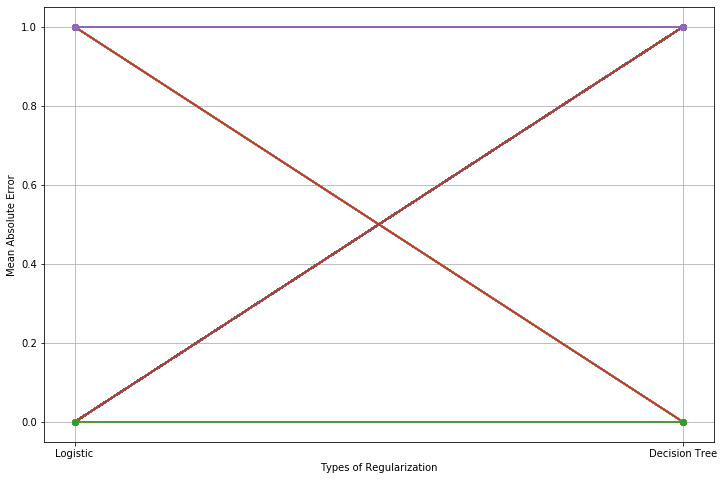

In [34]:
plt.figure(figsize=(12,8))
plt.plot(["Logistic","Decision Tree"],[prediction_log,prediction_tree],marker='o')
plt.grid()
plt.xlabel("Types of Regularization")
plt.ylabel("Mean Absolute Error")

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20)
regressor.fit(x_train_Tfidf, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred = regressor.predict(x_test_tfidf)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[5960   25]
 [ 197  211]]
0.9652745190051619


In [38]:
regressor.score(x_test_tfidf,y_test)

0.9652745190051619

# K Neariest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(x_train_Tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
pred = knn.predict(x_test_tfidf)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
print(confusion_matrix(y_test,pred))

[[5969   16]
 [ 260  148]]


# Support Vector Machine

In [45]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train_Tfidf, y_train)

In [ ]:
model.predict(x_test_tfidf)

In [ ]:
model.score(X_test, y_test)